In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-27 00:52:11.218314


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-13897.0137)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 64


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.5980)tensor(9.0021)tensor(4.4933)tensor(4.6255)tensor(4.8455)tensor(2.8925)tensor(4.4713)tensor(3.4941)tensor(5.9704)tensor(3.5298)tensor(4.4553)tensor(4.8074)tensor(7.2853)tensor(4.5292)tensor(5.7228)tensor(4.3675)tensor(6.3769)tensor(4.1730)tensor(5.4419)tensor(3.4601)tensor(3.5263)tensor(4.2627)tensor(5.4986)tensor(4.7962)tensor(5.0605)tensor(5.4929)tensor(11.4996)tensor(7.0702)tensor(3.9951)tensor(4.3515)tensor(5.9925)tensor(4.7778)tensor(4.0961)tensor(4.7084)tensor(7.7402)tensor(3.4694)tensor(6.1232)tensor(4.3866)tensor(4.5658)tensor(4.8209)tensor(3.9107)tensor(2.7543)tensor(3.3601)tensor(3.9817)tensor(3.3093)tensor(3.9462)tensor(5.9817)tensor(3.5978)tensor(5.1790)tensor(3.4660)tensor(4.8787)tensor(3.7098)tensor(2.5124)tensor(4.5804)tensor(6.4299)tensor(3.2076)tensor(4.5407)tensor(2.8311)tensor(9.3141)tensor(4.8238)tensor(7.1096)tensor(3.8333)tensor(3.1102)tensor(5.6612)tensor(4.1893)tensor(11.9279)tensor(5.0297)tensor(6.0342)tensor(4.1769)tensor(6.2326)tensor(4.5640)tens

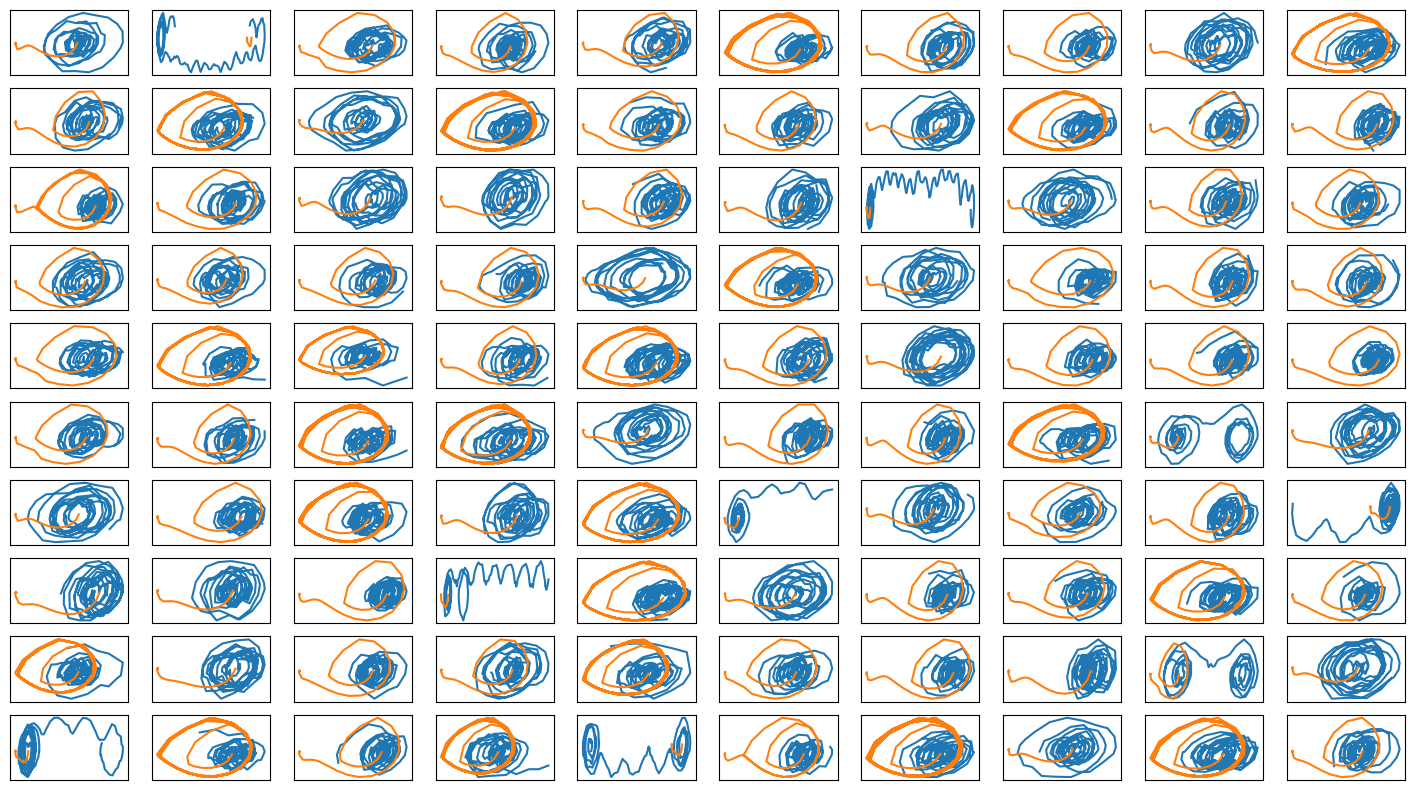

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 2177.13640  validloss 495.70295±0.00000  bestvalidloss 495.70295  last_update 0
train: iter 1  trainloss 5473.86395  validloss 312.03657±0.00000  bestvalidloss 312.03657  last_update 0
train: iter 2  trainloss 4177.44119  validloss 360.30247±0.00000  bestvalidloss 312.03657  last_update 1
train: iter 3  trainloss 4642.25568  validloss 350.21515±0.00000  bestvalidloss 312.03657  last_update 2
train: iter 4  trainloss 1538.20864  validloss 371.34016±0.00000  bestvalidloss 312.03657  last_update 3
train: iter 5  trainloss 350.99317  validloss 374.17158±0.00000  bestvalidloss 312.03657  last_update 4
train: iter 6  trainloss 323.82649  validloss 345.32533±0.00000  bestvalidloss 312.03657  last_update 5
train: iter 7  trainloss 285.55841  validloss 307.47536±0.00000  bestvalidloss 307.47536  last_update 0
train: iter 8  trainloss 199.52450  validloss 240.58753±0.00000  bestvalidloss 240.58753  last_update 0
train: iter 9  trainloss 120.79102  vali

train: iter 77  trainloss -526.29297  validloss 4725.48123±0.00000  bestvalidloss -618.08710  last_update 21
train: iter 78  trainloss -531.05195  validloss 3232.09678±0.00000  bestvalidloss -618.08710  last_update 22
train: iter 79  trainloss -537.01519  validloss 4624.70257±0.00000  bestvalidloss -618.08710  last_update 23
train: iter 80  trainloss -529.72786  validloss 1530.02956±0.00000  bestvalidloss -618.08710  last_update 24
train: iter 81  trainloss -499.63772  validloss 1547.01696±0.00000  bestvalidloss -618.08710  last_update 25
train: iter 82  trainloss -559.09247  validloss 18859.54536±0.00000  bestvalidloss -618.08710  last_update 26
train: iter 83  trainloss -561.06808  validloss 16204.39640±0.00000  bestvalidloss -618.08710  last_update 27
train: iter 84  trainloss -558.70186  validloss 7352.23824±0.00000  bestvalidloss -618.08710  last_update 28
train: iter 85  trainloss -539.45338  validloss -601.10811±0.00000  bestvalidloss -618.08710  last_update 29
train: iter 86  t

train: iter 153  trainloss -646.22300  validloss -249.00719±0.00000  bestvalidloss -700.24790  last_update 1
train: iter 154  trainloss -634.51653  validloss -377.10269±0.00000  bestvalidloss -700.24790  last_update 2
train: iter 155  trainloss -667.45352  validloss -218.24474±0.00000  bestvalidloss -700.24790  last_update 3
train: iter 156  trainloss -578.55496  validloss 4422.75066±0.00000  bestvalidloss -700.24790  last_update 4
train: iter 157  trainloss -664.28220  validloss -684.73137±0.00000  bestvalidloss -700.24790  last_update 5
train: iter 158  trainloss -646.84846  validloss -680.78980±0.00000  bestvalidloss -700.24790  last_update 6
train: iter 159  trainloss -644.71381  validloss -592.09041±0.00000  bestvalidloss -700.24790  last_update 7
train: iter 160  trainloss -648.33329  validloss -717.66198±0.00000  bestvalidloss -717.66198  last_update 0
train: iter 161  trainloss -676.63180  validloss -439.86681±0.00000  bestvalidloss -717.66198  last_update 1
train: iter 162  tr

train: iter 228  trainloss -698.80836  validloss -735.84523±0.00000  bestvalidloss -771.28129  last_update 23
train: iter 229  trainloss -708.29877  validloss -754.63387±0.00000  bestvalidloss -771.28129  last_update 24
train: iter 230  trainloss -703.68018  validloss -746.35410±0.00000  bestvalidloss -771.28129  last_update 25
train: iter 231  trainloss -694.66419  validloss -740.81321±0.00000  bestvalidloss -771.28129  last_update 26
train: iter 232  trainloss -698.65735  validloss -739.44440±0.00000  bestvalidloss -771.28129  last_update 27
train: iter 233  trainloss -703.01152  validloss -712.78463±0.00000  bestvalidloss -771.28129  last_update 28
train: iter 234  trainloss -698.47777  validloss -781.99251±0.00000  bestvalidloss -781.99251  last_update 0
train: iter 235  trainloss -688.46695  validloss -777.96148±0.00000  bestvalidloss -781.99251  last_update 1
train: iter 236  trainloss -698.21354  validloss -723.99257±0.00000  bestvalidloss -781.99251  last_update 2
train: iter 2

train: iter 303  trainloss -728.00739  validloss 2322.59917±0.00000  bestvalidloss -781.99251  last_update 69
train: iter 304  trainloss -736.67862  validloss -754.47843±0.00000  bestvalidloss -781.99251  last_update 70
train: iter 305  trainloss -715.92903  validloss -765.94151±0.00000  bestvalidloss -781.99251  last_update 71
train: iter 306  trainloss -714.92810  validloss -612.73459±0.00000  bestvalidloss -781.99251  last_update 72
train: iter 307  trainloss -714.00200  validloss 5093.20613±0.00000  bestvalidloss -781.99251  last_update 73
train: iter 308  trainloss -672.60606  validloss -707.83465±0.00000  bestvalidloss -781.99251  last_update 74
train: iter 309  trainloss -701.47461  validloss 3788.54240±0.00000  bestvalidloss -781.99251  last_update 75
train: iter 310  trainloss -725.35774  validloss -742.82250±0.00000  bestvalidloss -781.99251  last_update 76
train: iter 311  trainloss -708.70383  validloss -750.48926±0.00000  bestvalidloss -781.99251  last_update 77
train: ite

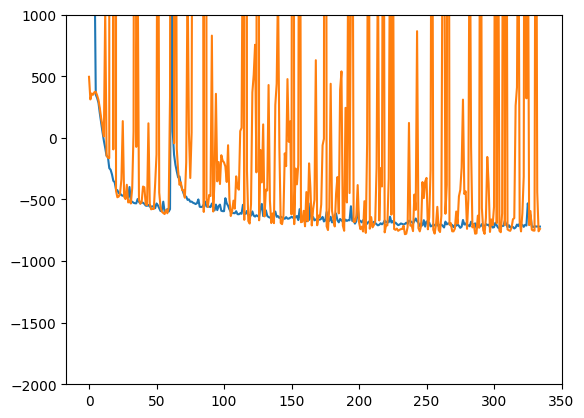

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  predict diverge [15.86836324 41.58222829] [ 2.42020727 16.56734822] [172.32584   25.186127] [86.16292  12.593063] sim_timestep 149
89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23 

実環境方策rollout vs Sim環境方策rollout


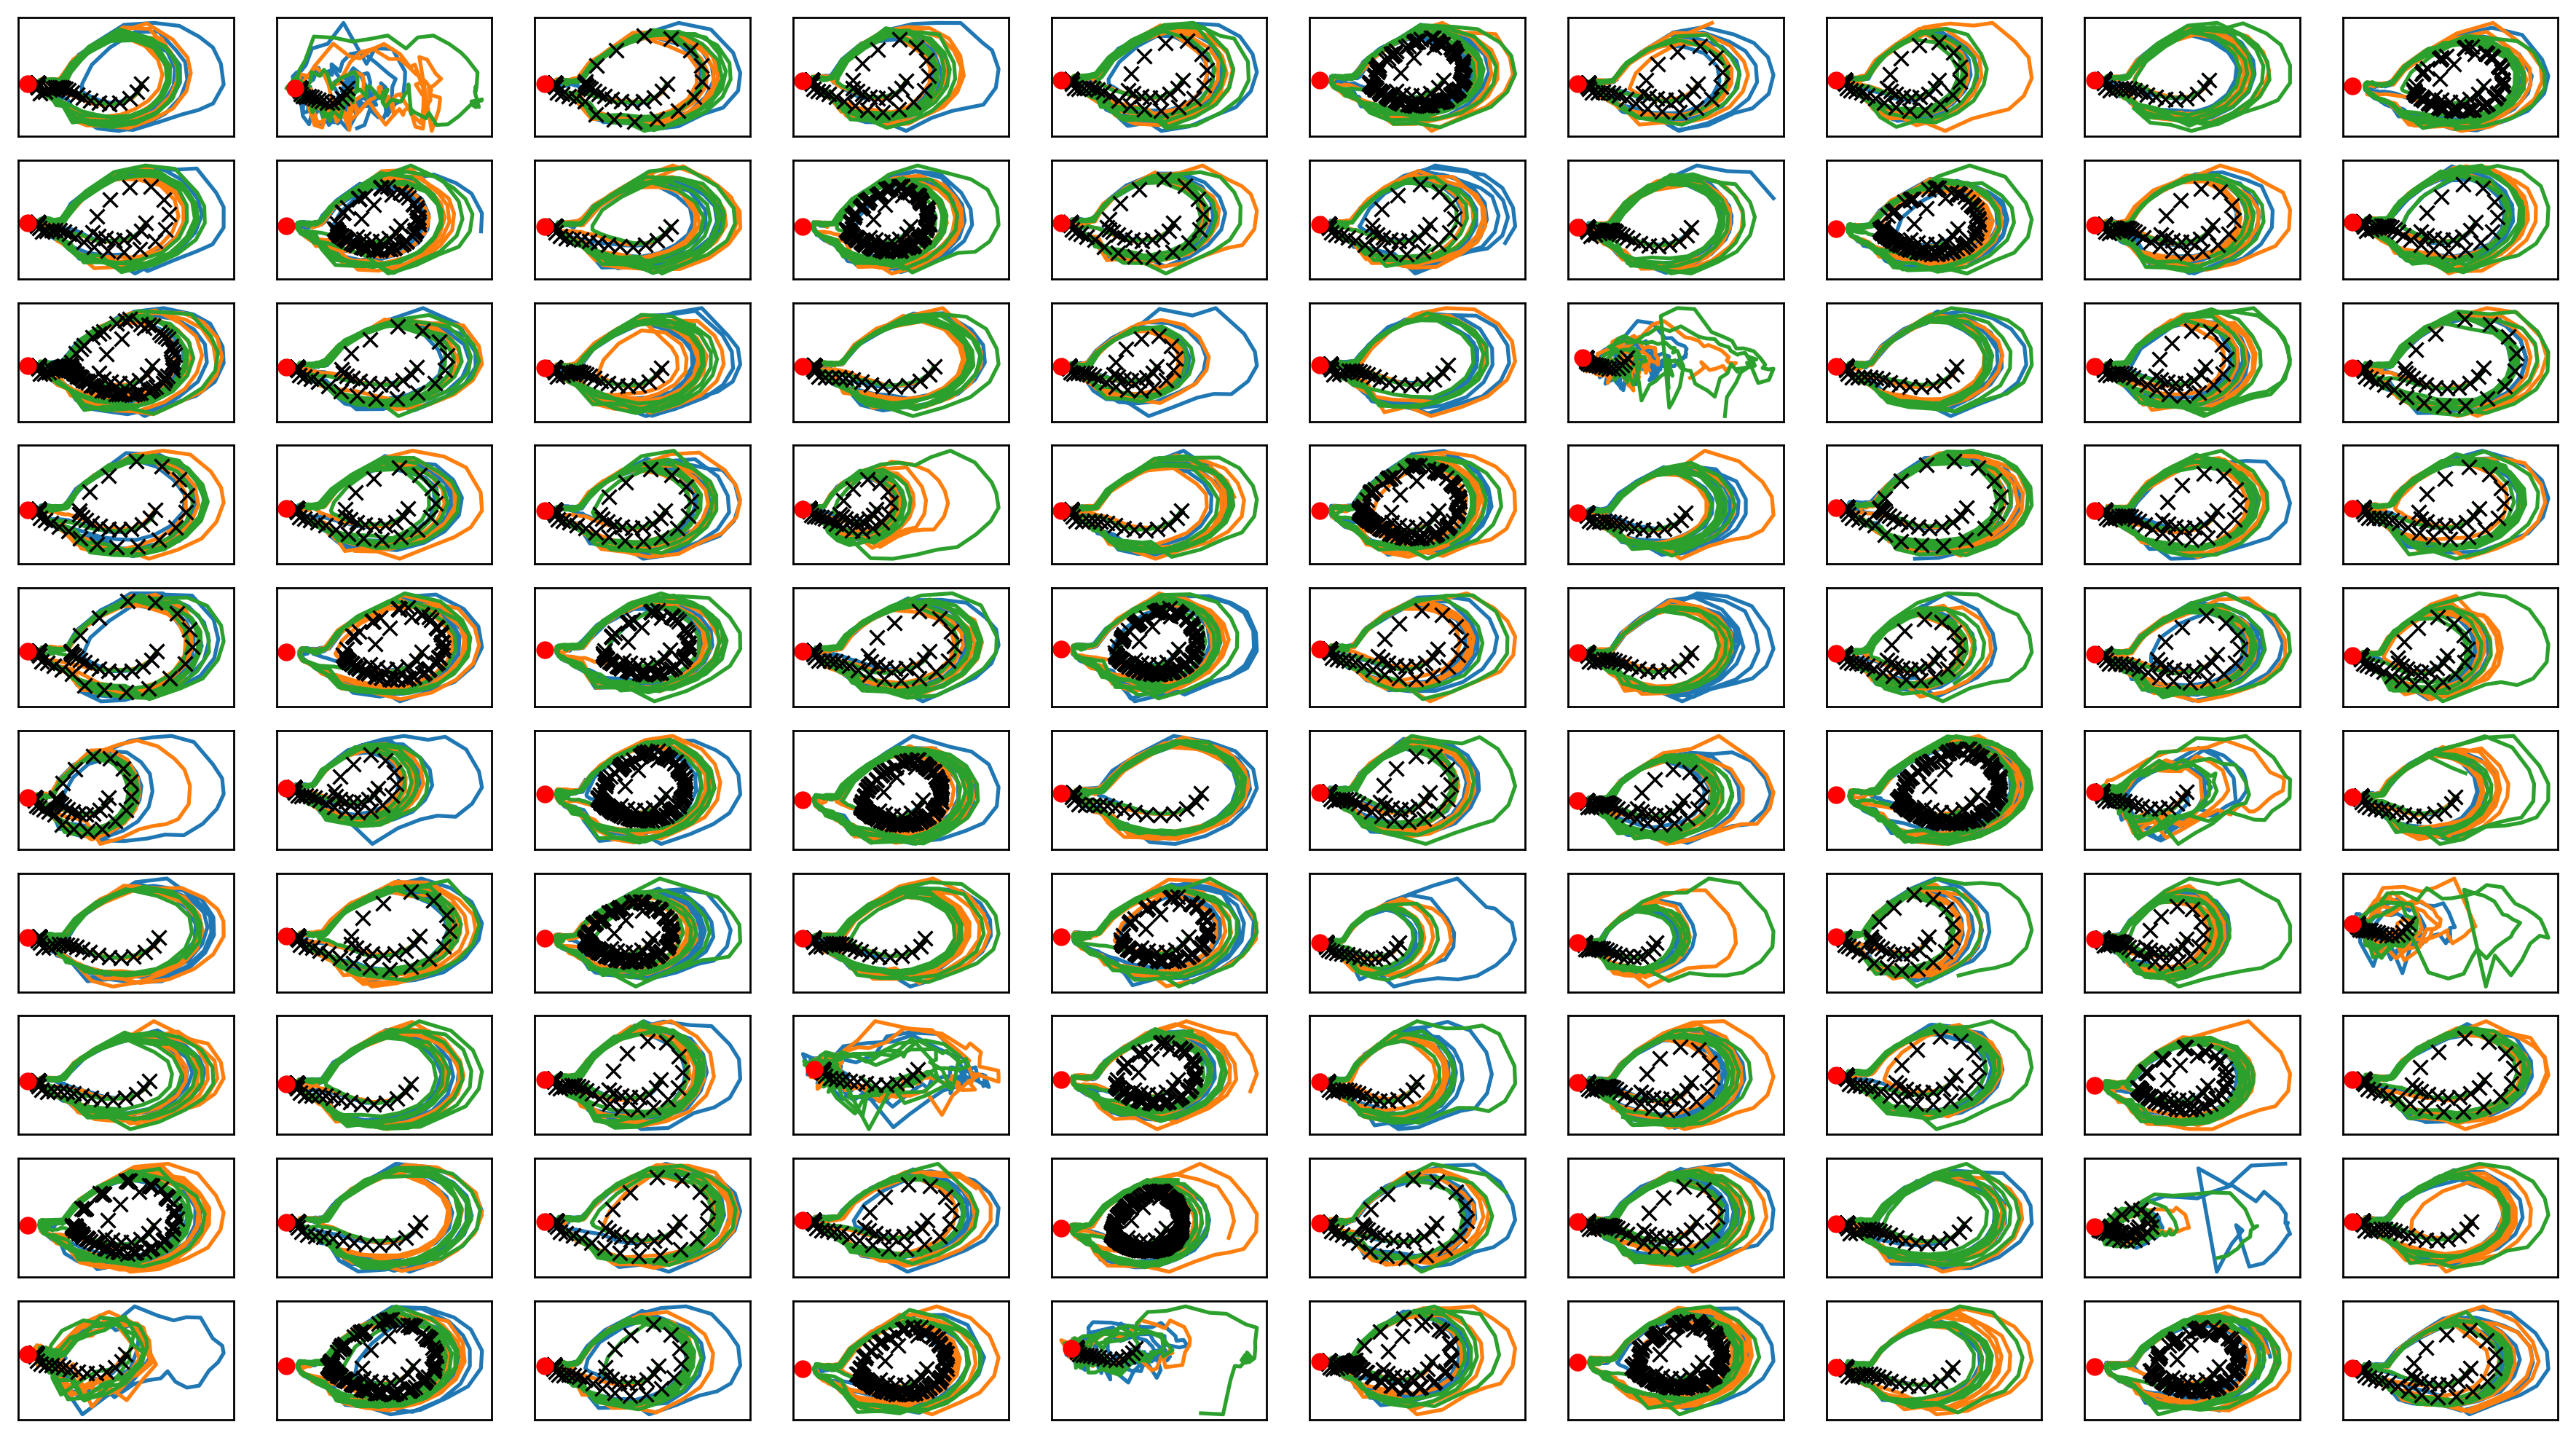

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

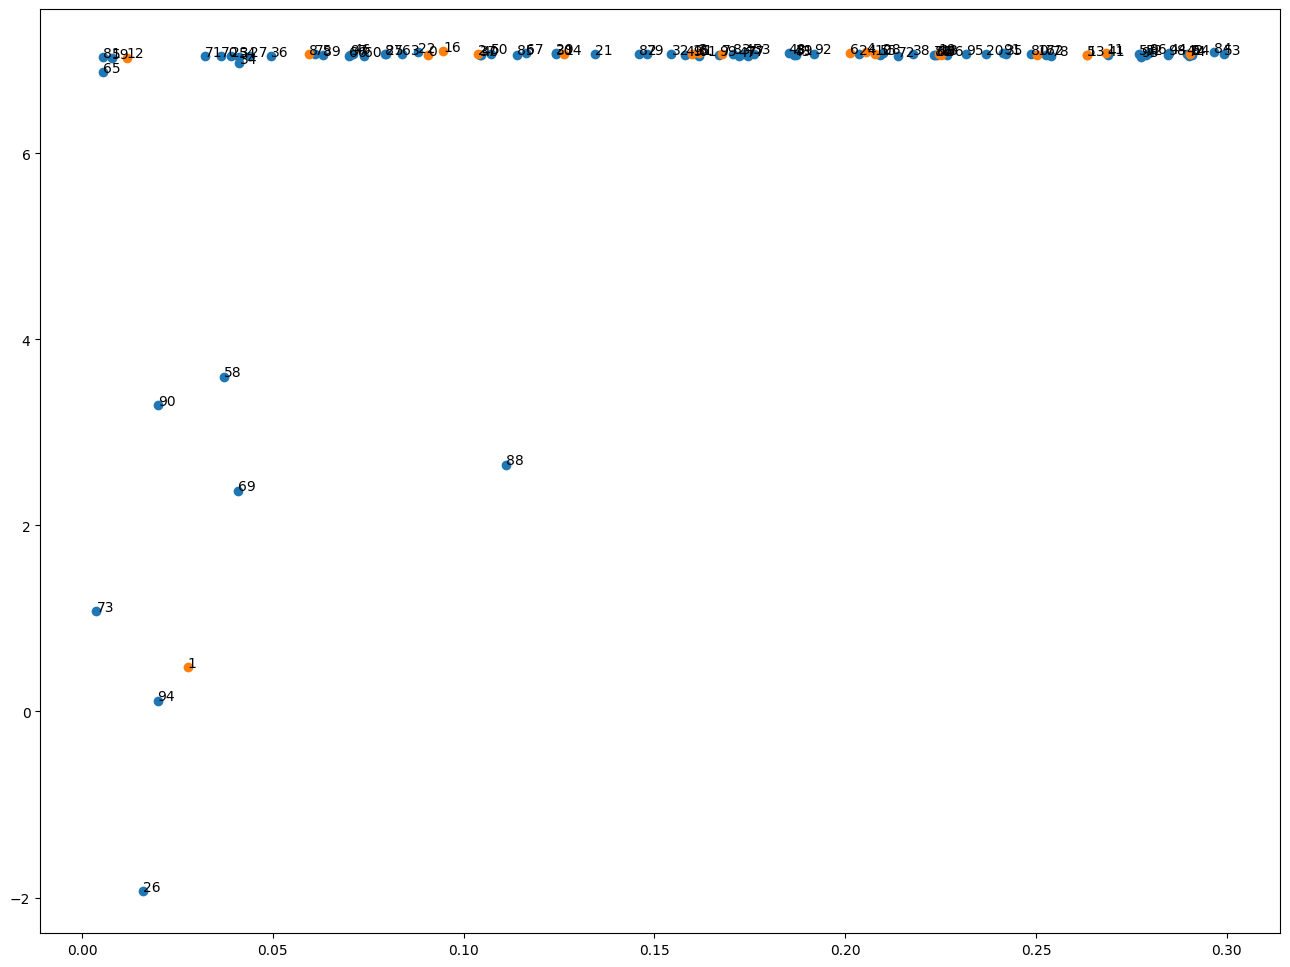

[0.09069977 0.02770158 0.10366822 0.16164502 0.20556585 0.26343523
 0.20114025 0.16760695 0.05943045 0.29047847 0.20769678 0.268382
 0.01171643 0.26344275 0.12633229 0.15994959 0.09465469 0.2503877
 0.22504329 0.2244497  0.2367838  0.13436806 0.08808424 0.03900857
 0.20365066 0.079664   0.01600876 0.04401857 0.20992751 0.1242168
 0.12425378 0.16076892 0.15446673 0.17596651 0.04124241 0.24221739
 0.04960626 0.10432976 0.2177994  0.18710166 0.1046695  0.26876587
 0.28945201 0.18650872 0.28484678 0.17351688 0.07110809 0.17210385
 0.18514347 0.15811743 0.10718093 0.18700803 0.27883117 0.29919686
 0.04114072 0.20904545 0.22663892 0.27690736 0.03728129 0.0078633
 0.07386332 0.16164932 0.25260927 0.0837551  0.29087872 0.00559419
 0.06989228 0.11635819 0.22413649 0.04093657 0.03640304 0.03224824
 0.21389669 0.00376679 0.2901829  0.06098797 0.22314776 0.17440768
 0.25404864 0.14813091 0.24869427 0.00557286 0.14590353 0.17065543
 0.29658485 0.11404235 0.22360033 0.07947587 0.11102526 0.0630522
 

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


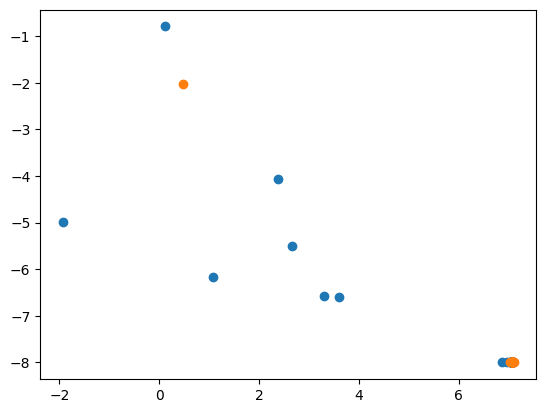

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 22.84413  validloss 24.66127±0.00000  bestvalidloss 24.66127  last_update 0
train: iter 1  trainloss 20.84201  validloss 22.51168±0.00000  bestvalidloss 22.51168  last_update 0
train: iter 2  trainloss 19.16161  validloss 20.59131±0.00000  bestvalidloss 20.59131  last_update 0
train: iter 3  trainloss 17.65534  validloss 18.98971±0.00000  bestvalidloss 18.98971  last_update 0
train: iter 4  trainloss 16.34791  validloss 17.50918±0.00000  bestvalidloss 17.50918  last_update 0
train: iter 5  trainloss 15.20213  validloss 16.21928±0.00000  bestvalidloss 16.21928  last_update 0
train: iter 6  trainloss 14.15343  validloss 15.11052±0.00000  bestvalidloss 15.11052  last_update 0
train: iter 7  trainloss 13.23094  validloss 14.12344±0.00000  bestvalidloss 14.12344  last_update 0
train: iter 8  trainloss 12.40973  validloss 13.17485±0.00000  bestvalidloss 13.17485  last_update 0
train: iter 9  trainloss 11.66578  validloss 12.35712±0.00000  bestvalidloss 12.35712  last

train: iter 86  trainloss 2.59382  validloss 2.61026±0.00000  bestvalidloss 2.61026  last_update 0
train: iter 87  trainloss 2.57933  validloss 2.60988±0.00000  bestvalidloss 2.60988  last_update 0
train: iter 88  trainloss 2.56922  validloss 2.58768±0.00000  bestvalidloss 2.58768  last_update 0
train: iter 89  trainloss 2.56095  validloss 2.58035±0.00000  bestvalidloss 2.58035  last_update 0
train: iter 90  trainloss 2.54715  validloss 2.57271±0.00000  bestvalidloss 2.57271  last_update 0
train: iter 91  trainloss 2.53872  validloss 2.55384±0.00000  bestvalidloss 2.55384  last_update 0
train: iter 92  trainloss 2.51909  validloss 2.56307±0.00000  bestvalidloss 2.55384  last_update 1
train: iter 93  trainloss 2.50845  validloss 2.52440±0.00000  bestvalidloss 2.52440  last_update 0
train: iter 94  trainloss 2.49818  validloss 2.51202±0.00000  bestvalidloss 2.51202  last_update 0
train: iter 95  trainloss 2.48857  validloss 2.49940±0.00000  bestvalidloss 2.49940  last_update 0
train: ite

train: iter 171  trainloss 1.92320  validloss 1.80904±0.00000  bestvalidloss 1.78453  last_update 8
train: iter 172  trainloss 1.95553  validloss 1.83555±0.00000  bestvalidloss 1.78453  last_update 9
train: iter 173  trainloss 1.94688  validloss 1.82603±0.00000  bestvalidloss 1.78453  last_update 10
train: iter 174  trainloss 1.93521  validloss 1.83160±0.00000  bestvalidloss 1.78453  last_update 11
train: iter 175  trainloss 1.89991  validloss 1.85598±0.00000  bestvalidloss 1.78453  last_update 12
train: iter 176  trainloss 1.93216  validloss 1.86885±0.00000  bestvalidloss 1.78453  last_update 13
train: iter 177  trainloss 1.90618  validloss 1.85826±0.00000  bestvalidloss 1.78453  last_update 14
train: iter 178  trainloss 1.93252  validloss 1.86087±0.00000  bestvalidloss 1.78453  last_update 15
train: iter 179  trainloss 1.89763  validloss 1.81845±0.00000  bestvalidloss 1.78453  last_update 16
train: iter 180  trainloss 1.91783  validloss 1.85437±0.00000  bestvalidloss 1.78453  last_up

train: iter 256  trainloss 1.93490  validloss 1.77983±0.00000  bestvalidloss 1.70536  last_update 4
train: iter 257  trainloss 1.92165  validloss 1.77449±0.00000  bestvalidloss 1.70536  last_update 5
train: iter 258  trainloss 1.90824  validloss 1.79139±0.00000  bestvalidloss 1.70536  last_update 6
train: iter 259  trainloss 1.89891  validloss 1.75462±0.00000  bestvalidloss 1.70536  last_update 7
train: iter 260  trainloss 1.89935  validloss 1.82072±0.00000  bestvalidloss 1.70536  last_update 8
train: iter 261  trainloss 1.89456  validloss 1.73754±0.00000  bestvalidloss 1.70536  last_update 9
train: iter 262  trainloss 1.88313  validloss 1.84093±0.00000  bestvalidloss 1.70536  last_update 10
train: iter 263  trainloss 1.92660  validloss 1.84025±0.00000  bestvalidloss 1.70536  last_update 11
train: iter 264  trainloss 1.94491  validloss 1.84239±0.00000  bestvalidloss 1.70536  last_update 12
train: iter 265  trainloss 1.91932  validloss 1.81463±0.00000  bestvalidloss 1.70536  last_update

train: iter 342  trainloss 1.95464  validloss 1.76468±0.00000  bestvalidloss 1.70536  last_update 90
train: iter 343  trainloss 1.91961  validloss 1.80935±0.00000  bestvalidloss 1.70536  last_update 91
train: iter 344  trainloss 1.86583  validloss 1.82037±0.00000  bestvalidloss 1.70536  last_update 92
train: iter 345  trainloss 1.91384  validloss 1.71877±0.00000  bestvalidloss 1.70536  last_update 93
train: iter 346  trainloss 1.91865  validloss 1.83897±0.00000  bestvalidloss 1.70536  last_update 94
train: iter 347  trainloss 1.88979  validloss 1.79391±0.00000  bestvalidloss 1.70536  last_update 95
train: iter 348  trainloss 1.90217  validloss 1.87133±0.00000  bestvalidloss 1.70536  last_update 96
train: iter 349  trainloss 1.89173  validloss 1.86716±0.00000  bestvalidloss 1.70536  last_update 97
train: iter 350  trainloss 1.91084  validloss 1.79862±0.00000  bestvalidloss 1.70536  last_update 98
train: iter 351  trainloss 1.86971  validloss 1.77257±0.00000  bestvalidloss 1.70536  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([6.5780, 1.0091], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 14.06176  validloss 19.25098±0.00000  bestvalidloss 19.25098  last_update 0
train: iter 1  trainloss 7.17827  validloss 9.90149±0.00000  bestvalidloss 9.90149  last_update 0
train: iter 2  trainloss 4.29222  validloss 4.62882±0.00000  bestvalidloss 4.62882  last_update 0
train: iter 3  trainloss 3.34109  validloss 2.55328±0.00000  bestvalidloss 2.55328  last_update 0
train: iter 4  trainloss 2.81463  validloss 1.80318±0.00000  bestvalidloss 1.80318  last_update 0
train: iter 5  trainloss 2.42111  validloss 1.49468±0.00000  bestvalidloss 1.49468  last_update 0
train: iter 6  trainloss 2.03227  validloss 1.38901±0.00000  bestvalidloss 1.38901  last_update 0
train: iter 7  trainloss 1.77052  validloss 1.30524±0.00000  bestvalidloss 1.30524  last_update 0
train: iter 8  trainloss 1.58958  validloss 1.39617±0.00000  bestvalidloss 1.30524  last_update 1
train: iter 9  trainloss 1.47191  validloss 1.31965±0.00000  bestvalidloss 1.30524  last_update 2
train: iter 10  t

train: iter 84  trainloss 1.19791  validloss 0.96948±0.00000  bestvalidloss 0.94011  last_update 12
train: iter 85  trainloss 1.18208  validloss 0.96519±0.00000  bestvalidloss 0.94011  last_update 13
train: iter 86  trainloss 1.19809  validloss 0.95151±0.00000  bestvalidloss 0.94011  last_update 14
train: iter 87  trainloss 1.19665  validloss 0.93941±0.00000  bestvalidloss 0.93941  last_update 0
train: iter 88  trainloss 1.20003  validloss 0.98532±0.00000  bestvalidloss 0.93941  last_update 1
train: iter 89  trainloss 1.18543  validloss 0.95556±0.00000  bestvalidloss 0.93941  last_update 2
train: iter 90  trainloss 1.20556  validloss 0.91455±0.00000  bestvalidloss 0.91455  last_update 0
train: iter 91  trainloss 1.18261  validloss 0.93088±0.00000  bestvalidloss 0.91455  last_update 1
train: iter 92  trainloss 1.20678  validloss 0.94228±0.00000  bestvalidloss 0.91455  last_update 2
train: iter 93  trainloss 1.19387  validloss 0.92738±0.00000  bestvalidloss 0.91455  last_update 3
train: 

train: iter 167  trainloss 1.18294  validloss 0.92044±0.00000  bestvalidloss 0.90343  last_update 40
train: iter 168  trainloss 1.18715  validloss 0.91779±0.00000  bestvalidloss 0.90343  last_update 41
train: iter 169  trainloss 1.16349  validloss 0.92406±0.00000  bestvalidloss 0.90343  last_update 42
train: iter 170  trainloss 1.16795  validloss 0.91765±0.00000  bestvalidloss 0.90343  last_update 43
train: iter 171  trainloss 1.19169  validloss 0.91831±0.00000  bestvalidloss 0.90343  last_update 44
train: iter 172  trainloss 1.17644  validloss 0.90449±0.00000  bestvalidloss 0.90343  last_update 45
train: iter 173  trainloss 1.16644  validloss 0.97159±0.00000  bestvalidloss 0.90343  last_update 46
train: iter 174  trainloss 1.20047  validloss 0.96943±0.00000  bestvalidloss 0.90343  last_update 47
train: iter 175  trainloss 1.19652  validloss 0.93756±0.00000  bestvalidloss 0.90343  last_update 48
train: iter 176  trainloss 1.18657  validloss 0.92591±0.00000  bestvalidloss 0.90343  last_

train: iter 249  trainloss 1.18335  validloss 0.90866±0.00000  bestvalidloss 0.89382  last_update 18
train: iter 250  trainloss 1.17047  validloss 0.93552±0.00000  bestvalidloss 0.89382  last_update 19
train: iter 251  trainloss 1.18739  validloss 0.93716±0.00000  bestvalidloss 0.89382  last_update 20
train: iter 252  trainloss 1.17815  validloss 0.91523±0.00000  bestvalidloss 0.89382  last_update 21
train: iter 253  trainloss 1.18475  validloss 0.92324±0.00000  bestvalidloss 0.89382  last_update 22
train: iter 254  trainloss 1.17897  validloss 0.91297±0.00000  bestvalidloss 0.89382  last_update 23
train: iter 255  trainloss 1.17459  validloss 0.91889±0.00000  bestvalidloss 0.89382  last_update 24
train: iter 256  trainloss 1.17796  validloss 0.92758±0.00000  bestvalidloss 0.89382  last_update 25
train: iter 257  trainloss 1.18889  validloss 0.92050±0.00000  bestvalidloss 0.89382  last_update 26
train: iter 258  trainloss 1.18531  validloss 0.90299±0.00000  bestvalidloss 0.89382  last_

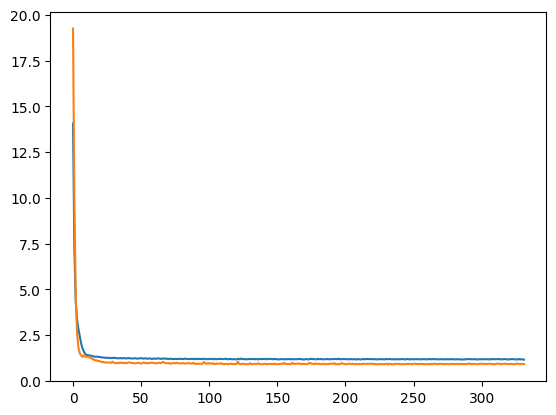

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(7.5871)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(0.5623)


In [21]:
print(vi.h_min_tilde)

-5.3700447


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.617601556833385
tensor([1.0480])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

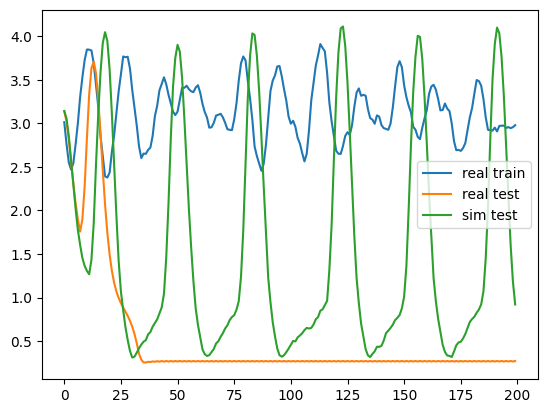

encoder [ 7.0720553 -8.       ]
initial_belief tensor([6.5780, 1.0091])
real train tensor([ 7.0972, -8.0000])
real test tensor([ 2.6451, -5.4953])
sim tensor([ 7.0478, -7.9884])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-3.36734693877551


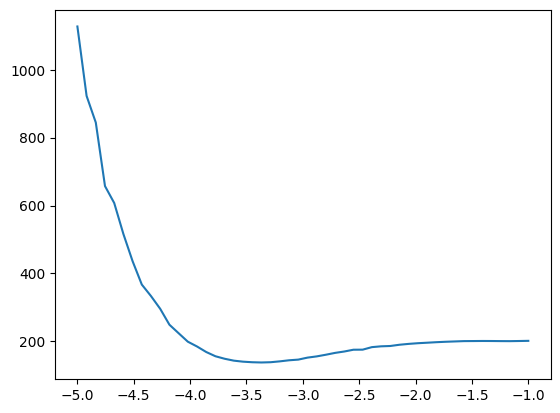

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.200040902719258
tensor([-0.5532])
